# V2 : Data Validation

### Result Visualization over 5 areas :
    - Residential 
    - Commercial
    - Transport Station
    - Parking Lot
    - Urban Vegetation

In [2]:
%load_ext autoreload
%autoreload 2
import os
import json
import rasterio
import numpy as np
import pickle
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import shapely
from to_degree import to_degree
from region_new import Region, emission_nlse
from region_new.raster import Raster
import xarray as xr
import rioxarray
from pyproj import Proj, transform

In [3]:

result_path = os.path.join('data', 'results', '')

In [4]:
# bounding boxes and FUA's
bounding_box = json.load(open('bounding_box.json'))
area_box = json.load(open('validation_box.json'))

In [5]:
residential = area_box["residential"]["box"]
commercial = area_box["commercial"]["box"]
transport = area_box["transport"]["box"]
parking = area_box["parking"]["box"]
vegetation = area_box["vegetation"]["box"]

In [6]:
def to_meter(x,y):
    inProj = Proj(init='epsg:4326')
    outProj = Proj(init='epsg:3395')
    x2,y2 = transform(inProj,outProj,x,y)
    return x2,y2

def format_box(box, meter=True):
    x1, y1, x2, y2 = box
    print(y2,x1, y1, x2)
    if meter:
        x3, y4 = to_meter(x1,y2)
        x4, y3 = to_meter(x2, y1)
        return (y4+500,x3-500), (y3-500,x4+500)
    return (y2+0.01, x1-0.01), (y1-0.01, x2+0.01)

In [ ]:
residential = format_box(residential)
commercial = format_box(commercial)
transport = format_box(transport)
parking = format_box(parking)
vegetation = format_box(vegetation)

#### Crop Results 

In [7]:
import contextily as cx

In [8]:
def box_clip(tiff_path, box):
    (max_lat, min_lon), (min_lat, max_lon) = box
    with rioxarray.open_rasterio(tiff_path) as src:
        grid = src.rio.clip_box(minx=min_lon, miny=min_lat, maxx=max_lon, maxy=max_lat)
    return grid

In [169]:
result_residential = box_clip(result_path+'cairo.tif', residential)
result_commercial = box_clip(result_path+'adana.tif', commercial)
result_transport = box_clip(result_path+'johannesburg.tif', transport)
result_parking = box_clip(result_path+'johannesburg.tif', parking)
result_vegetation = box_clip(result_path+'adana.tif', vegetation)

#### Plot Results

In [205]:
def plot_results(tif, name):
    ax1 = tif.plot(cmap='bone', figsize=(7,7))
    path = os.path.join('data','results','')
    image = plt.imread(path+name+'.png')
    plt.figure(figsize=(7,7))
    plt.imshow(image)
    plt.show()

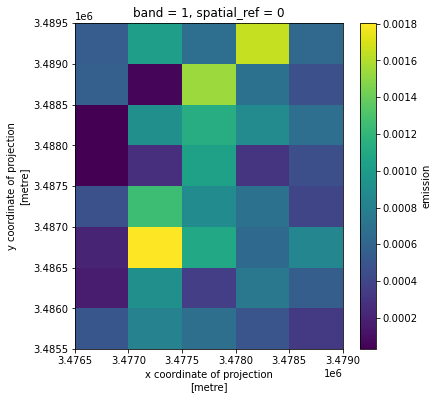

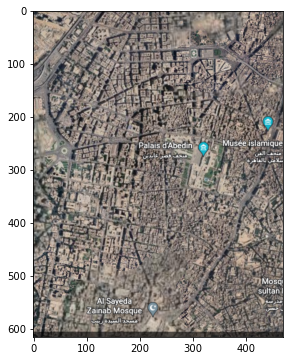

In [185]:
plot_results(result_residential, "residential")

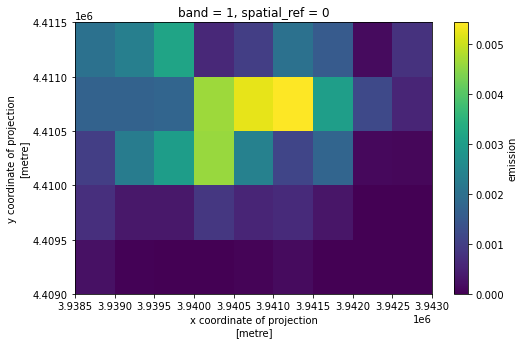

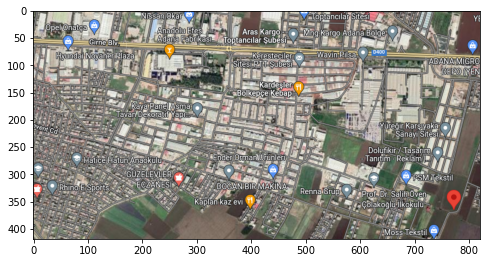

In [190]:

plot_results(result_commercial, 'commercial')

#### Wrong estimation on commercial areas

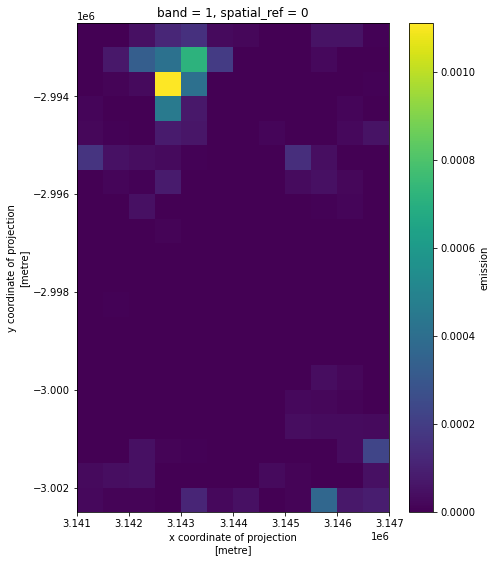

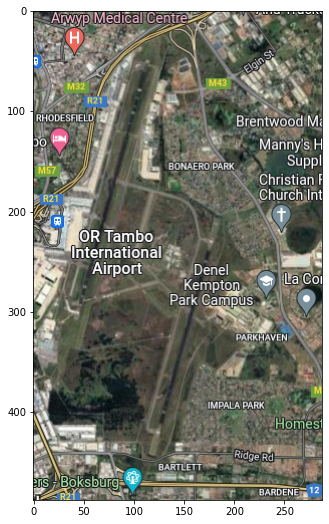

In [193]:
plot_results(result_transport, 'transport')

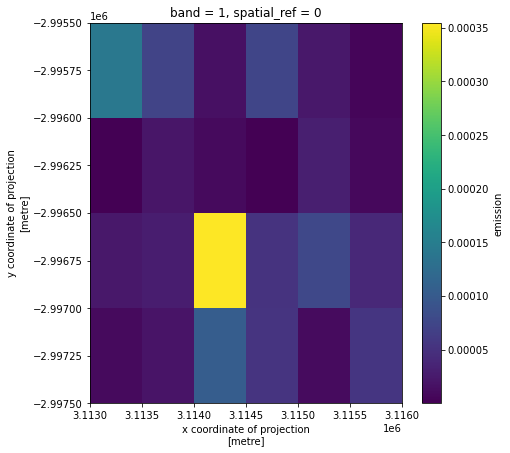

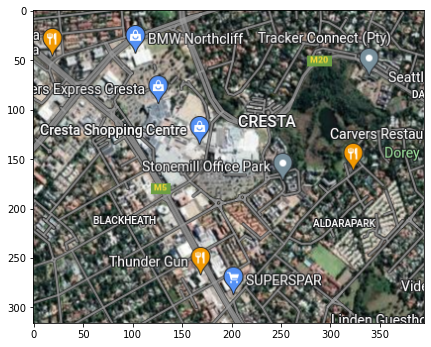

In [196]:

plot_results(result_parking, 'parking')

#### Error with parking lots / commercial centers

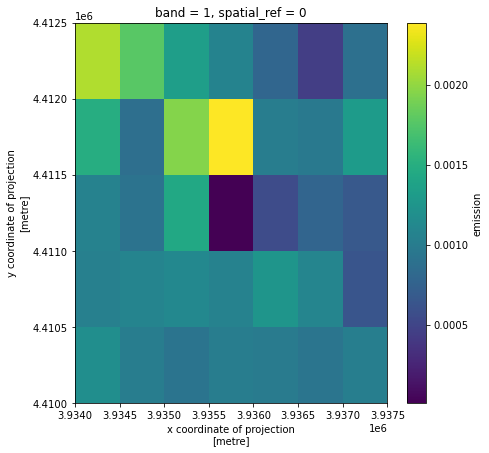

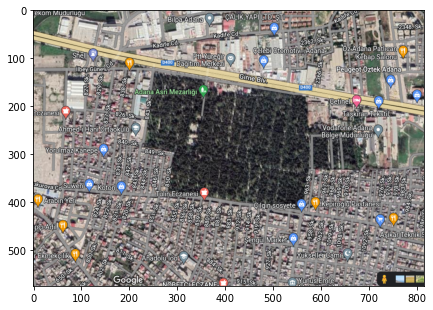

In [197]:
plot_results(result_vegetation, 'vegetation')

##### Error on urban vegetation ? or is the resolution too coarse ?

### Variables

In [9]:
ntl_path = os.path.join ('data','ntl','ntl_avg_2101.tif') 
pop_path = os.path.join ('data','pop','')
height_path = os.path.join('data', 'height', '')

In [10]:
residential = area_box["residential"]["box"]
commercial = area_box["commercial"]["box"]
transport = area_box["transport"]["box"]
parking = area_box["parking"]["box"]
vegetation = area_box["vegetation"]["box"]
residential = format_box(residential, meter=False)
commercial = format_box(commercial, meter=False)
transport = format_box(transport, meter=False)
parking = format_box(parking, meter=False)
vegetation = format_box(vegetation, meter=False)

30.0517423162 31.2348435406 30.031681237 31.2463448528
36.9825522612 35.3878486156 36.9730899565 35.411709547
-26.1031534234 28.2216687062 -26.1721933354 28.2630390981
-26.1270446183 27.9706139424 -26.134519247 27.9832310536
36.9889969255 35.3476798534 36.9807695981 35.3624427319


/home/matt/.local/lib/python3.10/site-packages/rasterio/windows.py:310: RasterioDeprecationWarning: The height, width, and precision parameters are unused, deprecated, and will be removed in 2.0.0.
  warnings.warn(


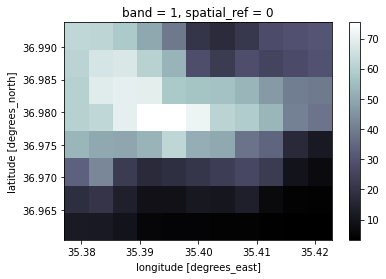

In [11]:
# Commercial

ntl_result = box_clip(ntl_path, commercial)
ntl_result.plot(cmap='bone')

In [15]:
tif = pop_path+'Adana.tif'
tif = rioxarray.open_rasterio(tif)
tif = tif.rio.reproject('epsg:4326')
tif.rio.to_raster(pop_path+'Adana.tif')
tif


: 

: 

/home/matt/.local/lib/python3.10/site-packages/rasterio/windows.py:310: RasterioDeprecationWarning: The height, width, and precision parameters are unused, deprecated, and will be removed in 2.0.0.
  warnings.warn(


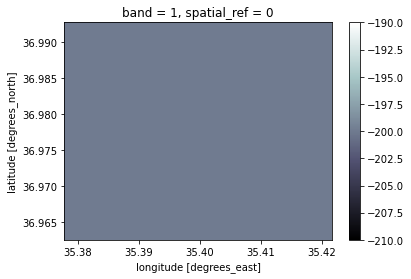

In [13]:
tif = pop_path+'Adana.tif'
tif = rioxarray.open_rasterio(tif)
tif

In [209]:
height_result = box_clip(height_path+'Adana.tif', commercial)
height_result 

<xarray.DataArray (band: 1, y: 12, x: 26)>
array([[[-1., -1., ..., -1., -1.],
        [-1., -1., ..., -1., -1.],
        ...,
        [-1., -1., ..., -1., -1.],
        [-1., -1., ..., -1., -1.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 35.39 35.39 35.39 35.39 ... 35.41 35.41 35.41 35.41
  * y            (y) float64 36.98 36.98 36.98 36.98 ... 36.98 36.97 36.97 36.97
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    _FillValue:    -1.0